## Post-processing Atqasuk LAKE model results 

This script post-process output from the LAKE model saved in "results/Atqasuk". 
This script uses lake_plot_utils.py script to plot the results.

EJ 02/18/21<br />

In [2]:
import pandas as pd
# import datetime
import numpy as np
# import lake_plot_utils as lpu
# import matplotlib.pyplot as plt
# %matplotlib inline


In [6]:
lpu.plot_water_temps_bwr('Atqasuk')
#lpu.plot_temps('Atgasuk','soil_temp')
#lpu.plot_temps('Atgasuk','water_temp')

NameError: name 'lpu' is not defined

In [ ]:
import pandas as pd
#df = pd.read_csv('Atgasuk_lake_NS/atqasuk-atq-2014-2015-meteorology-timeseries-calon.csv', encoding = "ISO-8859-1",usecols=[i for i in range(0,10)])
Atgasuk_meas= pd.read_csv('data/atqasuk-atq-200-2014-15-laketimeseries.csv', encoding = "ISO-8859-1",skiprows=1)
#Atgasuk_meas.plot()
Atgasuk_meas.plot(subplots=True, layout=(6,2),figsize=(12, 10));

In [1]:
import numpy as np
def validate(fdir):
    #Atgasuk_ice=np.loadtxt(u"results/"+fdir+"/time_series/ice_temp  1  1.dat",skiprows=6)
    Atgasuk_calc=np.loadtxt(u"results/"+fdir+"/time_series/water_temp  1  1.dat",skiprows=6)
    Atgasuk_meas= pd.read_csv('data/atqasuk-atq-200-2014-15-laketimeseries.csv', encoding = "ISO-8859-1",skiprows=1)

    df_met = pd.read_csv('data/Atqasuk.dat')
    df_met.columns = ["Temp [K]","Pres [Pa]","LWdown [W/m2]","SWdown [W/m2]",
                            "Uspeed [m/s]","Vspeed [m/s]","Hum [kg/kg]","Precip [m/s]"]

    
    m=np.loadtxt(u"results/"+fdir+"/time_series/layers  1  1.dat",skiprows=19)
    xlim=len(Atgasuk_meas["TempC, 30cm"])
    fig, (ax1, ax2, ax3,ax4) = plt.subplots(4, figsize=(12, 10))
    fig.suptitle('Atqasuk, hourly',fontsize=16)

    ax1.plot(Atgasuk_meas["TempC, 30cm"])
    ax1.plot(Atgasuk_calc[:,6],alpha=0.75)
    ax1.set_xlim([0,xlim])
    ax1.legend(['meas 30cm','calc 30cm'],fontsize=12)
    plt.setp(ax1, ylabel='Temperature [$^oC$]')

    ax2.plot(Atgasuk_meas["TempC, 250cm"])
    ax2.plot(Atgasuk_calc[:,-1],alpha=0.75)
    ax2.legend(['meas 250cm','calc 250cm'],fontsize=12)
    ax2.set_xlim([0,xlim])
    plt.setp(ax2, ylabel='Temperature [$^oC$]')
    
    ax3.plot(m[:,14],linewidth=2) 
    ax3.plot(m[:,15],linewidth=2,alpha=0.75)
    ax3.plot(df_met["Precip [m/s]"]*1e6,alpha=0.5)
    ax3.legend(['ice','snow','precip*1e6'],fontsize=12);
    ax3.set_xlim([0,xlim])
    plt.setp(ax3, ylabel='depth [m]')
    
    import scipy.signal
    sensor_depth=scipy.signal.savgol_filter(Atgasuk_meas["Sensor Depth, m"], 101, 2, mode='wrap')
    ax4.plot(sensor_depth,linewidth=2)
    ax4.set_xlim([0,xlim])
    ax4.set_ylim([0,2.7])
    ax4.legend(['sensor depth'],fontsize=12);
    plt.setp(ax4, ylabel='depth [m]')
    plt.setp(ax4, xlabel='Time [h]')

validate("Atgasuk_first")

OSError: results/Atgasuk_first/time_series/water_temp  1  1.dat not found.

In [2]:
validate("Atgasuk")# 2.5,1 added; swe_full[800:1200]=0

OSError: results/Atgasuk/time_series/water_temp  1  1.dat not found.

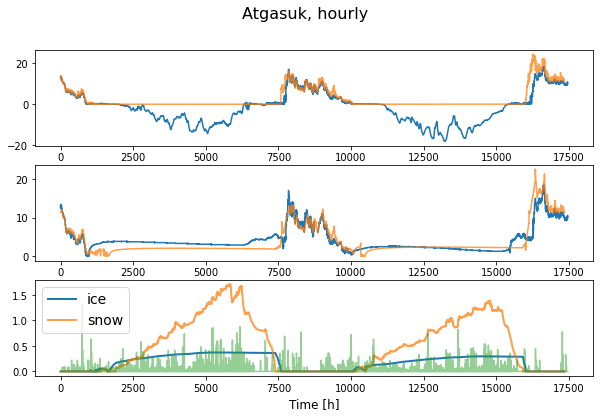

In [9]:
validate("Atgasuk") # 0,0

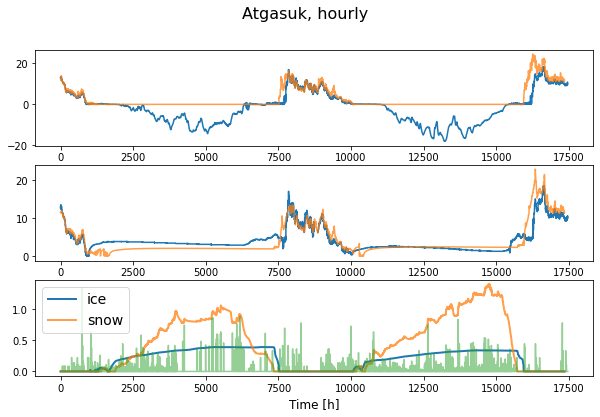

In [18]:
validate("Atgasuk") # 0,1

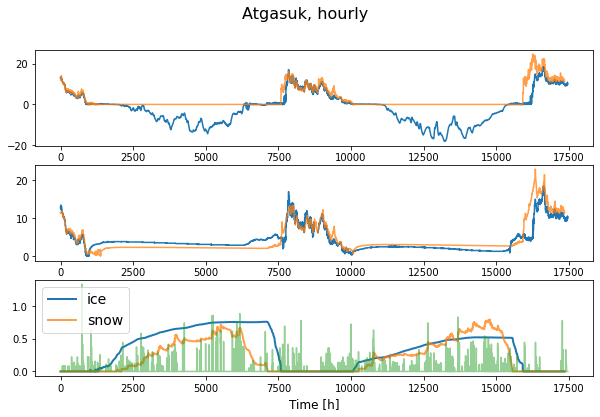

In [27]:
validate("Atgasuk") # 1,1

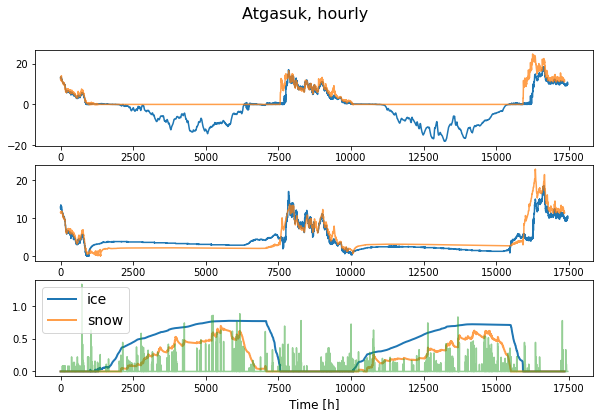

In [32]:
validate("Atgasuk") # 1.2,1

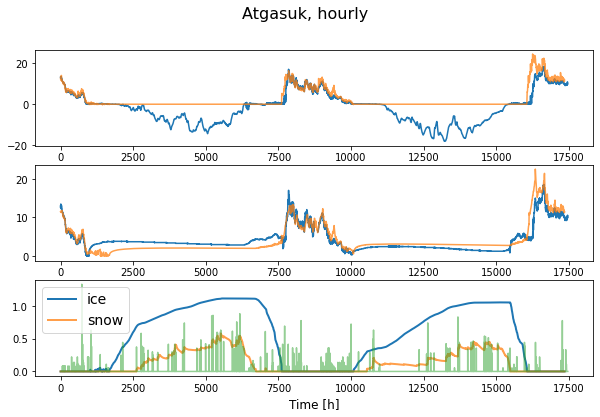

In [41]:
validate("Atgasuk") # 2,1

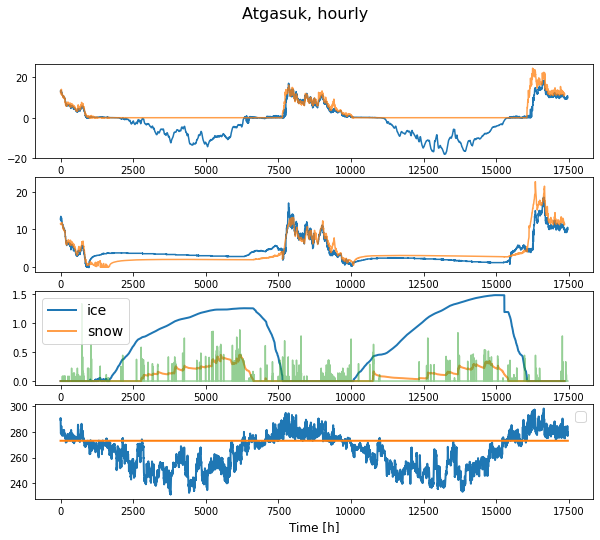

In [56]:
validate("Atgasuk") # 3,1

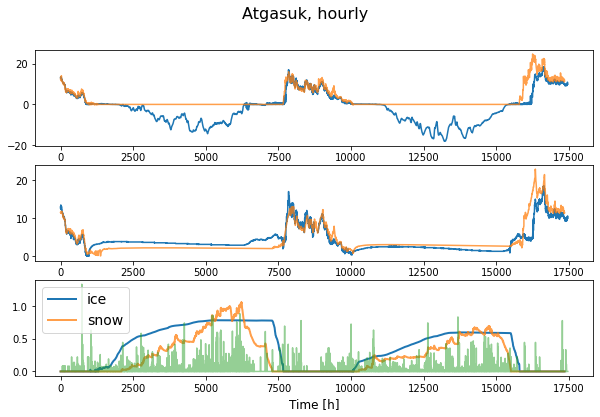

In [82]:
validate("Atgasuk_1yr_too_much_snow")

Text(0.5, 0, 'Temperature [$^oC$]')

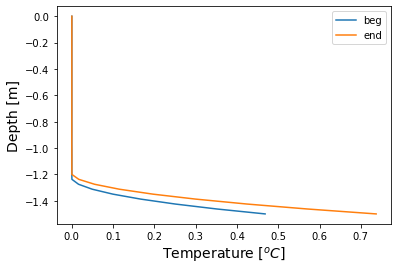

In [66]:
mm=np.loadtxt(u"results/FoxDen/daily/Profiles  1  120160701.dat",skiprows=8)
mm1=np.loadtxt(u"results/FoxDen/daily/Profiles  1  120170701.dat",skiprows=8)
plt.plot(mm[:,1],mm[:,0]);
plt.plot(mm1[:,1],mm[:,0]);
plt.legend(['beg','end']);
plt.ylabel('Depth [m]',fontsize=14)
plt.xlabel('Temperature [$^oC$]',fontsize=14)